# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy import stats
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [4]:
med_mean = np.mean(medical['charges'])
med_mean

13270.422265141257

In [5]:
med_std = np.std(medical['charges'])
med_std

12105.484975561605

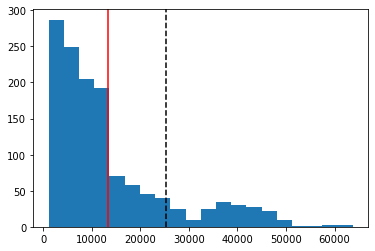

In [6]:
plt.hist(medical['charges'],bins=20)
plt.axvline(med_mean+med_std, color='k', linestyle='--')
plt.axvline(med_mean, color='r');

In [7]:
np.max(medical['charges'])

63770.42801

In [8]:
np.min(medical['charges'])

1121.8739

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Sampling Distribution of the Mean

In [9]:
def mean_sampler(n):
    return np.random.choice(medical['charges'], n)

In [10]:
mean_sample1 = mean_sampler(50)
np.mean(mean_sample1)

15078.499098599998

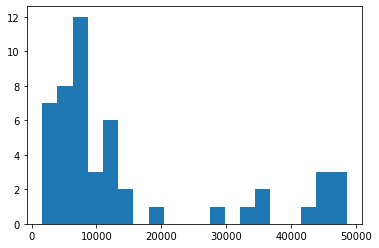

In [11]:
plt.hist(mean_sample1, bins=20);

In [12]:
mean_sample_means = [np.mean(mean_sampler(100)) for i in range(100)]

In [13]:
msm = np.mean(mean_sample_means)
msm

13157.776413129399

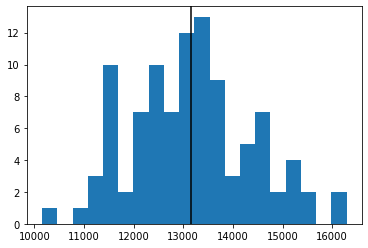

In [14]:
plt.hist(mean_sample_means, bins=20);
plt.axvline(msm, color='k');

Mean: 13277.57


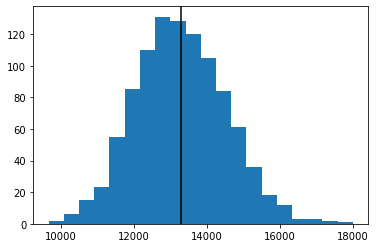

In [15]:
# Set the sample size
sample_size = 1000
# Sample 100 random samples for the sample size iterations
mean_sample_means = [np.mean(mean_sampler(100)) for i in range(sample_size)]
# Find the mean of the sample
msm = np.mean(mean_sample_means)
plt.hist(mean_sample_means, bins=20);
plt.axvline(msm, color='k');
print('Mean:',msm.round(2))

In [16]:
# Find the standard deviation
msm_std = np.std(mean_sample_means, ddof=1)
print('Standard Deviation:',msm_std.round(2))

Standard Deviation: 1233.72


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Since administration is worried about the average charge being below $12,000 a lower one-sided interval would be appropriate.

In [17]:
# 95% of the distribution using ppf()
x = t.ppf(.975, 100, msm, msm_std)
y = t.ppf(0.025, 100, msm, msm_std)
y, x

(10829.91289948332, 15725.234721484074)

In [18]:
# T Value
# Sample Size 1000
# DOF 999
# Alpha Value = .05
t_value = 1.646 # from T table
print('T Value:', t_value)

T Value: 1.646


In [19]:
# Calculate Standard Error
# Standard Deviation / sqrt of sample size
std_error = msm_std / np.sqrt(1000)
print('Standard Error:', std_error.round(2))

Standard Error: 39.01


In [20]:
# Margin of Error = T Value * Standard Error
margin_of_error = t_value * std_error
print('Margin of Error:', margin_of_error.round(2))

Margin of Error: 64.22


In [21]:
# 95% confidence interval of the mean - Lower One Sided
print('95% Convidence Interval of the Mean: $',(msm - margin_of_error).round(2),' - $', msm.round(2))

95% Convidence Interval of the Mean: $ 13213.36  - $ 13277.57


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that the means are the same and that the insured patients are not charged on average more than the uninsured patients.  
  
  Since the P-Value was less than .01 we can reject the null hypothesis and state that insured patients are charged more on average than the uninsured patients.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [22]:
# Create DF of non-insurance charges
charges = medical.loc[medical['insuranceclaim'] == 0, 'charges']
charges.head()

2     4449.46200
3    21984.47061
5     3756.62160
7     7281.50560
8     6406.41070
Name: charges, dtype: float64

In [23]:
# Create DF of insurance charges
ins_charges = medical.loc[medical['insuranceclaim'] == 1, 'charges']
ins_charges.head()

0     16884.9240
1      1725.5523
4      3866.8552
6      8240.5896
10     2721.3208
Name: charges, dtype: float64

In [24]:
# Mean of non-insurance charges
charges_mean = np.mean(charges)
charges_mean

8821.421892306294

In [25]:
# Mean of insurance charges
ins_chg_mean = np.mean(ins_charges)
ins_chg_mean

16423.928276537663

In [26]:
# Standard Deviation of charges
charges_std = np.std(charges)
charges_std

6440.699841605233

In [27]:
# Standard Deviation of ins_charges
ins_chg_std = np.std(ins_charges)
ins_chg_std

14036.956250260411

In [28]:
# Number of samples for charges
charges_n = charges.count()
charges_n

555

In [29]:
# Number of samples for ins_charges
ins_chg_n = ins_charges.count()
ins_chg_n

783

#### Manual Caclulation  
Pooled Standard Deviation = 104.62  
T = -1,304.6368  
  
  Different Formula T = -13.30

#### SciPy T-test

In [31]:
t_val = stats.ttest_ind(charges, ins_charges, equal_var = False)
t_val

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ __statsmodels.stats.weightstats.ztest__  
statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)[source]  
test for mean based on normal distribution, one or two samples  
  
In the case of two samples, the samples are assumed to be independent.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test